In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("price.csv")

In [11]:
class LinReg:
    def __init__(self, lr=0.01, itr=1000):
        self.lr = lr
        self.itr = itr
        self.w = None
        self.b = None
        self.loss = []
    
    def fit(self, X, y):
        n = X.shape[0]
        m = X.shape[1]
        self.w = np.zeros(m)
        self.b = 0
        
        for i in range(self.itr):
            yp = np.dot(X, self.w) + self.b
            dw = (1/n) * np.dot(X.T, (yp - y))
            db = (1/n) * np.sum(yp - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db
            l = np.mean((y - yp) ** 2)
            self.loss.append(l)
    
    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [12]:
def split_data(X, y, ts=0.2, rs=42):
    np.random.seed(rs)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    sp = int((1 - ts) * X.shape[0])
    return X[:sp], X[sp:], y[:sp], y[sp:]


In [16]:
def norm(X_tr, X_te):
    mn = X_tr.min(axis=0)
    mx = X_tr.max(axis=0)
    X_tr_n = (X_tr - mn) / (mx - mn + 1e-8)
    X_te_n = (X_te - mn) / (mx - mn + 1e-8)
    return X_tr_n, X_te_n

def rmse(yt, yp):
    return np.sqrt(np.mean((yt - yp) ** 2))

In [13]:
df1 = df.drop(columns=['car_ID'])
cols = df1.select_dtypes(include=['number']).columns.tolist()
cols.remove('price')
X1 = df1[cols].values
y1 = df1['price'].values


In [14]:
print(f"Shape: {df1.shape}")
print(f"Features: {len(cols)}")

Shape: (205, 25)
Features: 14


In [17]:
X1_tr, X1_te, y1_tr, y1_te = split_data(X1, y1)
X1_tr_n, X1_te_n = norm(X1_tr, X1_te)
m1 = LinReg(lr=0.1, itr=2000)
m1.fit(X1_tr_n, y1_tr)
p1 = m1.predict(X1_te_n)
r1 = rmse(y1_te, p1)

In [19]:
print("RMSE:", r1)
print("Predictions:")
print(pd.DataFrame({
    'Actual': y1_te[:5],
    'Predicted': p1[:5]
}))

RMSE: 3909.1192057431417
Predictions:
    Actual     Predicted
0  15690.0  22074.822505
1  15040.0  18614.907579
2  11549.0  13869.375158
3  18420.0  19170.015750
4  10795.0  12327.221077


In [20]:
#clean

In [24]:
q1 = df1['price'].quantile(0.25)
q3 = df1['price'].quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

In [25]:
df2 = df1[(df1['price'] >= lb) & (df1['price'] <= ub)]

In [26]:

X2 = df2[cols].values
y2 = df2['price'].values


X2_tr, X2_te, y2_tr, y2_te = split_data(X2, y2)
X2_tr_n, X2_te_n = norm(X2_tr, X2_te)


m2 = LinReg(lr=0.1, itr=2000)
m2.fit(X2_tr_n, y2_tr)


p2 = m2.predict(X2_te_n)
r2 = rmse(y2_te, p2)

print("RMSE:", r2)
print("Improvement:", r1 - r2)

RMSE: 2830.1226626291564
Improvement: 1078.9965431139854


In [33]:
def mae(yt, yp):
    return np.mean(np.abs(yt - yp))

def r2_score(yt, yp):
    ss_res = np.sum((yt - yp) ** 2)
    ss_tot = np.sum((yt - np.mean(yt)) ** 2)
    return 1 - (ss_res / ss_tot)


In [36]:

r2_val = r2_score(y2_te, p2)
mae_val = mae(y2_te, p2)


print("MAE:", mae_val)
print("R² Score:", r2_val)


MAE: 2075.909956065818
R² Score: 0.7224060470919055


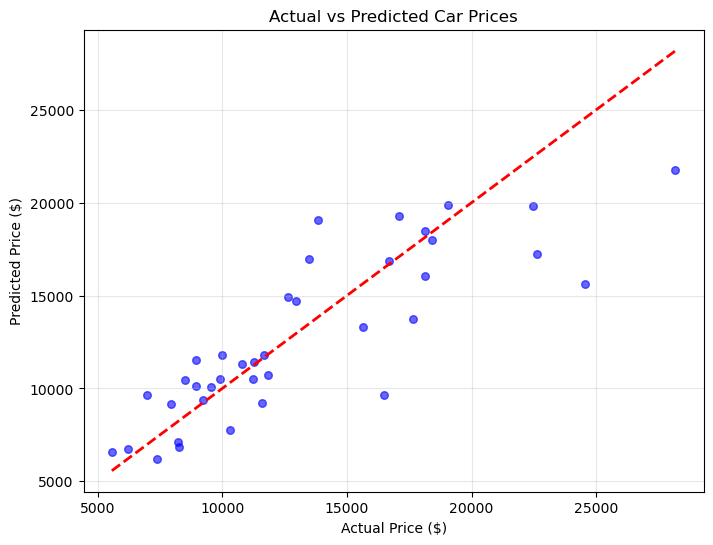

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y3_te, p3, alpha=0.6, s=30, color='blue')
plt.plot([y3_te.min(), y3_te.max()], [y3_te.min(), y3_te.max()], 'r--', lw=2)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True, alpha=0.3)
plt.show()

In [48]:
final_results = pd.DataFrame({
    'Actual': y3_te,
    'Predicted': p3,
    'Abs_Error': np.abs(y3_te - p3),
    '%_Error': np.abs(y3_te - p3) / y3_te * 100
})

print(final_results.head())  # Show first 5 rows


print("\n Avg Absolute Error:", final_results['Abs_Error'].mean())
print("\n Avg % Error:", final_results['%_Error'].mean())




    Actual     Predicted    Abs_Error    %_Error
0  11694.0  11784.081568    90.081568   0.770323
1   8948.0  11522.990612  2574.990612  28.777276
2  11595.0   9199.497951  2395.502049  20.659785
3  28176.0  21752.945856  6423.054144  22.796189
4   8495.0  10439.914041  1944.914041  22.894809

 Avg Absolute Error: 2130.460143047823

 Avg % Error: 15.663637348516067
